In [47]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
# Importamos los módulos específicos
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Para clasificar
from sklearn.linear_model import LogisticRegression

# Escalador de 0 a 1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
# Cargamos los datos del dataframe de pandas
dt_heart = pd.read_csv('./data/heart.csv')
dt_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
# Guardamos nuestro dataset sin la columna de target
dt_features = dt_heart.drop(['target'], axis=1)
    
# Este será nuestro dataset con las etiquetas
dt_target = dt_heart['target']

In [53]:
# Normalizamos los datos
dt_features = StandardScaler().fit_transform(dt_features)
dt_features

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [65]:
# Partimos el conjunto de entrenamiento. Para añadir replicabilidad usamos el random state
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", y_train.shape) #Valores 0 o 1, es decir si tiene enfermedad cardiaca o no

Tamaño del conjunto de entrenamiento: (512, 13)
Tamaño del conjunto de prueba: (512,)


In [69]:
# Llamamos y configuramos nuestro algoritmo pca
'''EL número de componentes es opcional, ya que por defecto si no le pasamos el número de componentes lo asignará de esta forma:
 a: n_components = min(n_muestras, n_features)'''
pca = PCA(n_components=3)

In [71]:
# Esto para que nuestro PCA se ajuste a los datos de entrenamiento que tenemos como tal
pca.fit(X_train)

PCA(n_components=3)

In [73]:
# Como haremos una comparación con incremental PCA, haremos lo mismo para el IPCA.
'''EL parámetro batch se usa para crear pequeños bloques, de esta forma podemos ir entrenandolos 
poco a poco y combinarlos en el resultado final'''
ipca = IncrementalPCA(n_components=3, batch_size=10)

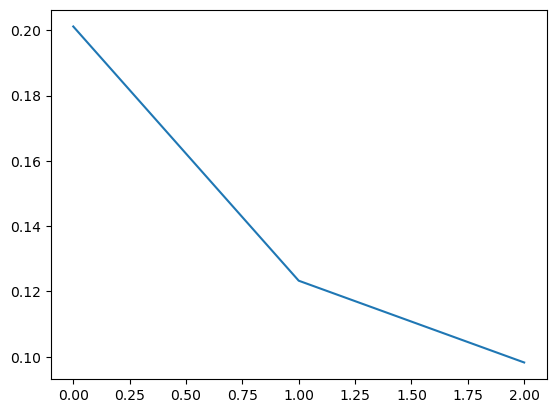

In [77]:
# Esto para que nuestro PCA se ajuste a los datos de entrenamiento que tenemos como tal
ipca.fit(X_train)
''' Aquí graficamos los números de 0 hasta la longitud de los componentes que me sugirió el PCA o que
me generó automáticamente el pca en el eje x, contra en el eje y, el valor de la importancia
en cada uno de estos componentes, así podremos identificar cuáles son realmente importantes
para nuestro modelo '''
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()
# Los puntos "marcados" hace referencia a las componentes que hemos marcado anteriormente cuando hemos
# creado el modelo que le hemos dado valor de 3. Como podemos ver la tercera componente ya
# casi es 0 por tanto no nos está aportando casi información a diferencia de las dos anteriores

In [81]:
# Ahora vamos a configurar nuestra regresión logística
logistic = LogisticRegression(solver='lbfgs')

In [83]:
# Configuramos los datos de entrenamiento
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)

In [87]:
# Mandamos los data frames la la regresión logística
logistic.fit(dt_train, y_train)

LogisticRegression()

In [89]:
# Calculamos nuestra exactitud de nuestra predicción
print("SCORE/ACURACY PCA: ", logistic.score(dt_test, y_test))

SCORE/ACURACY PCA:  0.7992202729044834


In [91]:
# Configuramos los datos de entrenamiento
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)

# Mandamos los data frames la la regresión logística
logistic.fit(dt_train, y_train)

# Calculamos nuestra exactitud de nuestra predicción
print("SCORE/ACURACY IPCA: ", logistic.score(dt_test, y_test)) 

SCORE/ACURACY IPCA:  0.797270955165692


In [ ]:
# Concluimos que el rendimiento fue casi el mismo